In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)

from tqdm import tqdm
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import clone
from sklearn.utils.validation import check_array
from sklearn.mixture import GaussianMixture
from sklearn.semi_supervised import LabelSpreading
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.spatial import distance
from scipy.cluster.vq import kmeans2
from scipy.stats import multivariate_normal
from qns3vm import QN_S3VM

# import gzip
# import nltk
# import requests
# from io import BytesIO
# import imblearn
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('wordnet') 
# import re
# import contractions
# from sklearn.preprocessing import LabelEncoder
# from bs4 import BeautifulSoup 
# pd.set_option('display.max_colwidth', None) 
# import requests
# import gensim.downloader as api
# from gensim.models import Word2Vec
# wv = api.load('word2vec-google-news-300')

In [2]:
X_review_h = np.load('X_home_review_wv.npy')
y_h = np.load('y_data_home_finalized.npy')
x_h = np.load('X_data_home_finalized.npy', allow_pickle=True)

In [3]:
X_review_k = np.load('X_Kitch_review_wv.npy', allow_pickle = True)
y_k = np.load('y_data_Kitch_finalized.npy' ,allow_pickle = True)
x_k = np.load('X_data_Kitch_finalized.npy', allow_pickle = True)

In [4]:
X_review_h.shape

(586121, 300)

In [5]:
X_review_k.shape

(293126, 300)

In [6]:
# Train split for Supervised Models

In [7]:
X_train_h, X_test_h, Y_train_h, Y_test_h = train_test_split(X_review_h, y_h, test_size=0.2, random_state=200)

In [8]:
X_train_k, X_test_k, Y_train_k, Y_test_k = train_test_split(X_review_k, y_k, test_size=0.2, random_state=200)

In [9]:
# Reduced data for TL & SSL & USL

In [10]:
X_train_h_r, X_test_h_r, Y_train_h_r, Y_test_h_r = train_test_split(X_review_h, y_h, train_size = 3000,
                                                                   test_size=600,random_state=200, stratify =y_h)

In [11]:
X_train_k_r, X_test_k_r, Y_train_k_r, Y_test_k_r = train_test_split(X_review_k, y_k, train_size = 400,
                                                                   test_size=200,random_state=200, stratify =y_k)

# Perceptron Model

In [12]:
clfPercep = Perceptron()
parameters = {'penalty':['l2','l1'] ,'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3]}
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state =13)
gridsearch = GridSearchCV(clfPercep, parameters, cv=cv, scoring='accuracy')
# Find the best params with grid search
gridsearch.fit(X_train_h, Y_train_h)
print("Best params: {}".format(gridsearch.best_params_))
print("Best f1 score: %.5f" % gridsearch.best_score_)

Best params: {'alpha': 0.0001, 'penalty': 'l2'}
Best f1 score: 0.72755


In [13]:
print("Perceptron model report on training and testing data: \n")
Y_train_pred = gridsearch.predict(X_train_h)
training_report = classification_report(Y_train_h, Y_train_pred, output_dict=False)
Y_test_pred = gridsearch.predict(X_test_h)
testing_report = classification_report(Y_test_h, Y_test_pred, output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

Perceptron model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78    234456
           1       0.79      0.76      0.77    234440

    accuracy                           0.78    468896
   macro avg       0.78      0.78      0.78    468896
weighted avg       0.78      0.78      0.78    468896

The testing report is:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     58604
           1       0.79      0.75      0.77     58621

    accuracy                           0.78    117225
   macro avg       0.78      0.78      0.78    117225
weighted avg       0.78      0.78      0.78    117225



# Decision Tree Model

In [14]:
clfTree = DecisionTreeClassifier(criterion = 'entropy')
parameters = {'max_depth': [2, 3, 4, 6]}
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state =13)
gridsearch = GridSearchCV(clfTree, parameters, cv=cv, scoring='accuracy')
# Find the best params with grid search
gridsearch.fit(X_train_h, Y_train_h)
print("Best params: {}".format(gridsearch.best_params_))
print("Best f1 score: %.5f" % gridsearch.best_score_)

Best params: {'max_depth': 6}
Best f1 score: 0.67798


In [15]:
print("Decision Tree model report on training and testing data: \n")
training_report = classification_report(Y_train_h, gridsearch.predict(X_train_h), output_dict=False)
testing_report = classification_report(Y_test_h, gridsearch.predict(X_test_h), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

Decision Tree model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69    234456
           1       0.69      0.65      0.67    234440

    accuracy                           0.68    468896
   macro avg       0.68      0.68      0.68    468896
weighted avg       0.68      0.68      0.68    468896

The testing report is:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69     58604
           1       0.69      0.64      0.67     58621

    accuracy                           0.68    117225
   macro avg       0.68      0.68      0.68    117225
weighted avg       0.68      0.68      0.68    117225



# Adaboost

In [16]:
clfAda = AdaBoostClassifier()
parameters = { 'n_estimators':[10,50,80], 'learning_rate':[0.001,0.01,0.1]}
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state =13)
gridsearch = GridSearchCV(clfAda, parameters, cv=cv, scoring='accuracy')
# Find the best params with grid search
gridsearch.fit(X_train_h, Y_train_h)
print("Best params: {}".format(gridsearch.best_params_))
print("Best f1 score: %.5f" % gridsearch.best_score_)

Best params: {'learning_rate': 0.1, 'n_estimators': 80}
Best f1 score: 0.72466


In [17]:
print("Adaboost model report on training and testing data: \n")
training_report = classification_report(Y_train_h, gridsearch.predict(X_train_h), output_dict=False)
testing_report = classification_report(Y_test_h, gridsearch.predict(X_test_h), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

Adaboost model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73    234456
           1       0.73      0.71      0.72    234440

    accuracy                           0.73    468896
   macro avg       0.73      0.73      0.73    468896
weighted avg       0.73      0.73      0.73    468896

The testing report is:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73     58604
           1       0.73      0.71      0.72     58621

    accuracy                           0.72    117225
   macro avg       0.72      0.72      0.72    117225
weighted avg       0.72      0.72      0.72    117225



# SVM

In [18]:
clfSVM = LinearSVC()
parameters = {'penalty':['l1', 'l2']}
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state =13)
gridsearch = GridSearchCV(clfSVM, parameters, cv=cv, scoring='accuracy')
# Find the best params with grid search
gridsearch.fit(X_train_h, Y_train_h)
print("Best params: {}".format(gridsearch.best_params_))
print("Best f1 score: %.5f" % gridsearch.best_score_)

/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/svm/_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/svm/_base.py", line 830, in _get_liblinear_solver_type
    r

Best params: {'penalty': 'l2'}
Best f1 score: 0.80147


In [19]:
print("SVM model report on training and testing data: \n")
training_report = classification_report(Y_train_h, gridsearch.predict(X_train_h), output_dict=False)
testing_report = classification_report(Y_test_h, gridsearch.predict(X_test_h), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

SVM model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80    234456
           1       0.81      0.79      0.80    234440

    accuracy                           0.80    468896
   macro avg       0.80      0.80      0.80    468896
weighted avg       0.80      0.80      0.80    468896

The testing report is:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     58604
           1       0.81      0.79      0.80     58621

    accuracy                           0.80    117225
   macro avg       0.80      0.80      0.80    117225
weighted avg       0.80      0.80      0.80    117225



# Logistic Regression 

In [20]:
clf = LogisticRegression()
parameters = {'penalty':['l2','l1'] }
cv = StratifiedKFold(n_splits=5, shuffle = True, random_state =13)
gridsearch = GridSearchCV(clf, parameters, cv=cv, scoring='accuracy')
gridsearch.fit(X_train_h, Y_train_h)
print("Best params: {}".format(gridsearch.best_params_))
print("Best f1 score: %.5f" % gridsearch.best_score_)

/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Best params: {'penalty': 'l2'}
Best f1 score: 0.80151


/Users/khalid/opt/anaconda3/envs/EE660/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print("Logistic model report on training and testing data: \n")
Y_train_pred = gridsearch.predict(X_train_h)
training_report = classification_report(Y_train_h, Y_train_pred, output_dict=False)
Y_test_pred = gridsearch.predict(X_test_h)
testing_report = classification_report(Y_test_h, Y_test_pred, output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

Logistic model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80    234456
           1       0.81      0.79      0.80    234440

    accuracy                           0.80    468896
   macro avg       0.80      0.80      0.80    468896
weighted avg       0.80      0.80      0.80    468896

The testing report is:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80     58604
           1       0.81      0.79      0.80     58621

    accuracy                           0.80    117225
   macro avg       0.80      0.80      0.80    117225
weighted avg       0.80      0.80      0.80    117225



# Baseline Models

In [22]:
def base_model_1(y_train, y_test):
    unique, counts = np.unique(y_train, return_counts=True)
    total = len(y_train)
    pi = []
    for value in counts:
        pi.append(value/total)
    Error_train = []
    Error_test = []
    for i in range(10):
        random.seed(i)
        y_predicted = []
        y_predicted_test = []
        for j in range(total):
            y_predicted.append(random.choices(unique, weights=pi))
        for k in range(len(y_test)):
            y_predicted_test.append(random.choices(unique, weights=pi))
        Error_train.append( 1 - accuracy_score(y_train, y_predicted) )
        Error_test.append( 1 - accuracy_score(y_test, y_predicted_test) )
    mean_error_train = np.mean(Error_train)
    std_train = np.std(Error_train)
    print('mean percent classification error (training): %.3f'\
          %mean_error_train)
    print('std of (training): %.4f'  %std_train)
    mean_error_test = np.mean(Error_test)
    std_test = np.std(Error_test)
    print('mean percent classification error (test): %.3f'%mean_error_test)
    print('std of (test): %.4f' %std_test)
    return


In [23]:
def base_model_2(y_train, y_test):
    unique, counts = np.unique(y_train, return_counts=True)
    total = len(y_train)
    pi = []
    for value in counts:
        pi.append(value/total)
    idx = np.argmax(pi)
    y_predicted = []
    y_predicted_test = []
    for j in range(total):
        y_predicted.append( unique[idx] )
    Error_train = 1 - accuracy_score(y_train, y_predicted)
    print('percent classification error (training): %.3f'%Error_train)
    for k in range(len(y_test)):
        y_predicted_test.append( unique[idx] )
    Error_test = 1 - accuracy_score(y_test, y_predicted_test)
    print('percent classification error (test): %.3f'%Error_test)
    return


In [24]:
base_model_1(Y_train_h, Y_test_h)

mean percent classification error (training): 0.500
std of (training): 0.0008
mean percent classification error (test): 0.500
std of (test): 0.0015


In [25]:
base_model_2(Y_train_h, Y_test_h)

percent classification error (training): 0.500
percent classification error (test): 0.500


# Transfer Learning

In [13]:
# supervised Learninig for the reduced data as a basline for TL Source
clfSVM = LinearSVC(penalty= 'l2')
clfSVM.fit(X_train_h_r, Y_train_h_r)

print("SVM model report on training and testing data: \n")
training_report = classification_report(Y_train_h_r, clfSVM.predict(X_train_h_r), output_dict=False)
testing_report = classification_report(Y_test_h_r, clfSVM.predict(X_test_h_r), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

SVM model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1500
           1       0.83      0.82      0.83      1500

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

The testing report is:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77       300
           1       0.77      0.78      0.77       300

    accuracy                           0.77       600
   macro avg       0.77      0.77      0.77       600
weighted avg       0.77      0.77      0.77       600



In [14]:
# using source predict target
testing_report = classification_report(Y_test_k_r, clfSVM.predict(X_test_k_r), output_dict=False)
print("The testing report is:\n", testing_report)

The testing report is:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       100
           1       0.73      0.85      0.79       100

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



In [15]:
# supervised Learninig for the reduced data as a basline for TL Target
clfSVM = LinearSVC(penalty= 'l2')
clfSVM.fit(X_train_k_r, Y_train_k_r)

print("SVM model report on training and testing data: \n")
training_report = classification_report(Y_train_k_r, clfSVM.predict(X_train_k_r), output_dict=False)
testing_report = classification_report(Y_test_k_r, clfSVM.predict(X_test_k_r), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

SVM model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       200
           1       0.96      0.92      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

The testing report is:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.78      0.73      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [17]:
X_uninon = np.concatenate((X_train_h_r, X_train_k_r), axis=0)
y_uninon = np.concatenate((Y_train_h_r, Y_train_k_r), axis=0)

clf_unio = LinearSVC(penalty='l2')
clf_unio.fit(X_uninon, y_uninon)
print("SVM model report on training and testing data: \n")
training_report = classification_report(y_uninon, clf_unio.predict(X_uninon), output_dict=False)
testing_report = classification_report(Y_test_k_r, clf_unio.predict(X_test_k_r), output_dict=False)
print("The training report is:\n", training_report)
print("The testing report is:\n", testing_report)

SVM model report on training and testing data: 

The training report is:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1700
           1       0.83      0.82      0.82      1700

    accuracy                           0.82      3400
   macro avg       0.82      0.82      0.82      3400
weighted avg       0.82      0.82      0.82      3400

The testing report is:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       100
           1       0.76      0.81      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



# TrAdaboost

In [28]:
class TrAdaBoost(object):
    def __init__(self,N=10,base_estimator=DecisionTreeClassifier(),score=roc_auc_score):    
        self.N=N
        self.base_estimator=base_estimator
        self.score=score
        self.beta_all = None
        self.estimators=[]
            
    def _calculate_weights(self,weights): 
        weights = weights.ravel()     
        total = np.sum(weights)   
        print("Total weight is: ",total," min Weight is: ",np.min(weights)," max Weight is: ",np.max(weights))   
        return np.asarray(weights / total, order='C')      
                    
    def _calculate_error_rate(self,y_true, y_pred, weight):      
        weight = weight.ravel()
        total = np.sum(weight) 
        print("Total weight is: ",total," min Weight is: ",np.min(weight)," max Weight is: ",np.max(weight))     
        return np.sum(weight / total * np.abs(y_true - y_pred))      
             
    def fit(self,source,target,source_label,target_label):
        source_shape=source.shape[0]
        target_shape=target.shape[0]
        trans_data = np.concatenate((source, target), axis=0)      
        trans_label = np.concatenate((source_label,target_label), axis=0)      
        weights_source = np.ones([source_shape, 1])/source_shape      
        weights_target = np.ones([target_shape, 1])/target_shape
        weights = np.concatenate((weights_source, weights_target), axis=0)
        
        bata = 1 / (1 + np.sqrt(2 * np.log(source_shape / self.N)))    
        self.beta_all = np.zeros([1, self.N])
        result_label = np.ones([source_shape+target_shape, self.N])    

        trans_data = np.asarray(trans_data, order='C')
        trans_label = np.asarray(trans_label, order='C')     
        
        best_round = 0
        score=0
        flag=0
        
        for i in tqdm(range(self.N)):      
            P = self._calculate_weights(weights) 
            est = clone(self.base_estimator).fit(trans_data,trans_label,sample_weight=P.ravel())
            self.estimators.append(est)
            y_preds=est.predict(trans_data)
            result_label[:, i]=y_preds

            y_target_pred=est.predict(target)
            error_rate = self._calculate_error_rate(target_label, y_target_pred,  \
                                              weights[source_shape:source_shape + target_shape, :])  
                  
            if error_rate >= 0.5 or error_rate == 0:      
                self.N = i
                print('early stop! due to error_rate=%.2f'%(error_rate))      
                break       

            self.beta_all[0, i] = error_rate / (1 - error_rate)      
     
            for j in range(target_shape):      
                weights[source_shape + j] = weights[source_shape + j] * \
                np.power(self.beta_all[0, i],(-np.abs(result_label[source_shape + j, i] - target_label[j])))
  
            for j in range(source_shape):      
                weights[j] = weights[j] * np.power(bata,np.abs(result_label[j, i] - source_label[j]))
                
            tp=self.score(target_label,y_target_pred)
            print('The '+str(i)+' rounds score is '+str(tp))

    def _predict_one(self, x):
        """
        Output the hypothesis for a single instance
        :param x: array-like
            target label of a single instance from each iteration in order
        :return: 0 or 1
        """
        x, N = check_array(x, ensure_2d=False), self.N
        # replace 0 by 1 to avoid zero division and remove it from the product
        beta = [self.beta_all[0,t] if self.beta_all[0,t] != 0 else 1 for t in range(int(np.ceil(N/2)), N)]
        cond = np.prod([b ** -x for b in beta]) >= np.prod([b ** -0.5 for b in beta])
        return int(cond)

    def predict(self, x_test):
        y_pred_list = np.array([est.predict(x_test) for est in self.estimators]).T
        y_pred = np.array(list(map(self._predict_one, y_pred_list)))
        return y_pred



In [268]:
X_train_h_r, X_test_h_r, Y_train_h_r, Y_test_h_r = train_test_split(X_review_h, y_h, train_size = 3000,
                                                                   test_size=600,random_state=200, stratify =y_h)

base_estimator = LinearSVC(penalty = 'l2')
clf = TrAdaBoost(N=4,base_estimator=base_estimator,score=accuracy_score)
clf.fit(X_train_h_r, X_train_k_r, Y_train_h_r, Y_train_k_r)

 75%|█████████████████████████████████▊           | 3/4 [00:00<00:00, 14.97it/s]

Total weight is:  2.0  min Weight is:  0.0003333333333333333  max Weight is:  0.0025
Total weight is:  0.9999999999999998  min Weight is:  0.0025  max Weight is:  0.0025
The 0 rounds score is 0.7825
Total weight is:  2.3508526805907266  min Weight is:  7.185919486047216e-05  max Weight is:  0.008994252873563216
Total weight is:  1.565  min Weight is:  0.0025  max Weight is:  0.008994252873563216
The 1 rounds score is 0.5
Total weight is:  2.4302746267282815  min Weight is:  1.5491231657985927e-05  max Weight is:  0.014313940883574195
Total weight is:  1.922183908045977  min Weight is:  0.0025  max Weight is:  0.014313940883574195
The 2 rounds score is 0.5
Total weight is:  2.3703953738914683  min Weight is:  3.3395623030197777e-06  max Weight is:  0.014313940883574202
Total weight is:  1.9221839080459775  min Weight is:  0.0025  max Weight is:  0.014313940883574202
early stop! due to error_rate=0.50


In [269]:
ys_pred = clf.predict(X_test_h_r)
print('test accuracy of source domain:',accuracy_score(Y_test_h_r, ys_pred))

yt_pred = clf.predict(X_train_k_r)
print('train accuracy of target domain:',accuracy_score(Y_train_k_r, yt_pred))

yt_test_pred = clf.predict(X_test_k_r)
print('The testing report of TL in target domain is:\n',classification_report(Y_test_k_r, yt_test_pred, output_dict=False))

test accuracy of source domain: 0.7
train accuracy of target domain: 0.7825
The testing report of TL in target domain is:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69       100
           1       0.68      0.90      0.78       100

    accuracy                           0.74       200
   macro avg       0.77      0.74      0.73       200
weighted avg       0.77      0.74      0.73       200



In [270]:
#baseline_target 
baseline_target = LinearSVC(penalty = 'l2')
baseline_target.fit(X_train_k_r, Y_train_k_r)
yt_test_pred = baseline_target.predict(X_test_k_r)
print('The testing report of SL in target domain is\n',classification_report(Y_test_k_r, yt_test_pred, output_dict=False))

The testing report of SL in target domain is
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       0.78      0.73      0.75       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [24]:
X_uninon = np.concatenate((x_train_h_r, x_train_k_r), axis=0)
y_uninon = np.concatenate((y_h, y_train_k_r), axis=0)

clf_unio = LinearSVC(penalty='l2')
clf_unio.fit(X_uninon, y_uninon)
y_pred_test_unio = clf_unio.predict(x_test_k_r)
acc_adab_t = accuracy_score(y_test_k_r, y_pred_test_unio)
print('The accuracy score of the SVC on test target data = ', acc_adab_t)

The accuracy score of the SVC on test target data =  0.785


In [25]:
clf_unio = AdaBoostClassifier(learning_rate=0.1, n_estimators=80)
clf_unio.fit(X_uninon, y_uninon)
y_pred_test_unio = clf_unio.predict(x_test_k_r)
acc_adab_t = accuracy_score(y_test_k_r, y_pred_test_unio)
print('The accuracy score of the AdaBoostClassifier onthe test target data = ', acc_adab_t)


The accuracy score of the AdaBoostClassifier onthe test target data =  0.76


# Importantance weighting

In [60]:

X_uninon = np.concatenate((X_train_h_r, X_train_k_r[:8,:]), axis=0)
y_uninon = np.concatenate((Y_train_h_r, Y_train_k_r[:8]), axis=0)


gm = GaussianMixture(n_components=2, random_state=0).fit(X_uninon)
means = gm.means_
cov_mat = gm.covariances_
print('The means = \n', means.shape)
print('The covariance matrices = \n', cov_mat.shape)


The means = 
 (2, 300)
The covariance matrices = 
 (2, 300, 300)


In [61]:
print('The means class zero 0 = \n', np.mean(means[0,:]-means[1,:]))
print('The means 1 = \n', np.mean(means[1,:]))

The means class zero 0 = 
 -0.0001780652428123944
The means 1 = 
 -0.003548618934282531


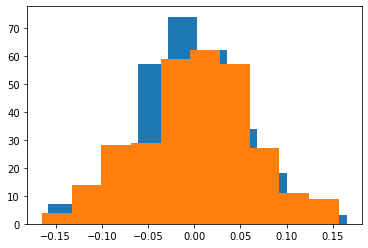

In [62]:
plt.hist(X_train_h_r[7,:])
plt.hist(X_train_k_r[7,:])
plt.show()

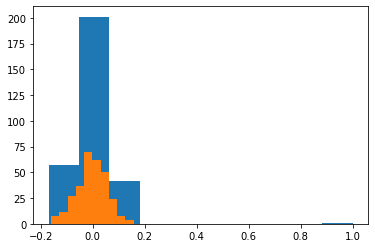

In [63]:
X_concept_h = np.concatenate((X_train_h_r, Y_train_h_r.reshape(-1,1)), axis=1)
plt.hist(X_concept_h[6,:])
X_concept_k = np.concatenate((X_train_k_r, Y_train_k_r.reshape(-1,1)), axis=1)
plt.hist(X_concept_k[6,:])
plt.show()

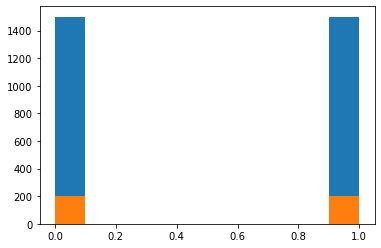

In [64]:
plt.hist(Y_train_h_r[:])
plt.hist(Y_train_k_r[:])
plt.show()

In [66]:
# warnings.filterwarnings("ignore")
# mean_s = means[0,:]
# cov_mat_s = cov_mat[0,:,:]

# mean_t = means[1,:]
# cov_mat_t = cov_mat[1,:,:]
# from sklearn.preprocessing import normalize

# X_uninon = normalize(X_uninon)

# w = multivariate_normal.pdf(X_uninon, mean=mean_t, cov=cov_mat_t) / multivariate_normal.pdf(X_uninon, mean=mean_s, cov=cov_mat_s)

# clf_unio = LinearSVC()
# clf_unio.fit(X_uninon, y_uninon, sample_weight = w)
# y_pred_test_unio = clf_unio.predict(X_test_h_r)
# acc_adab_t = accuracy_score(Y_test_h_r, y_pred_test_unio)
# print('The accuracy score of the source AdaBoostClassifier on target data = ', acc_adab_t)


# Semi-Suervised Learning

In [12]:
# trained Labeld and unlabeled
X_train_h_r, X_test_h_r, Y_train_h_r, Y_test_h_r = train_test_split(X_review_h, y_h, train_size = 1000,
                                                                   test_size=300,random_state=200, stratify =y_h)

x_h_l = X_train_h_r[:8,:]
y_h_l = Y_train_h_r[:8]
y_h_labeled = np.where(y_h_l == 0 , -1, 1)

x_h_u = X_train_h_r[8:,:]
y_h_u = Y_train_h_r[8:]
y_h_un = np.where(y_h_u  == 0 , -1, 1)

# test Labeld 
# X_test_h_r[]
y_h_test = np.where(Y_test_h_r  == 0 , -1, 1)


In [21]:
import warnings
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)

# train and predict on labeled data
clf_3 = QN_S3VM(x_h_l.tolist(), y_h_labeled.tolist(), x_h_u.tolist(), lam=1, 
                kernel_type='Linear', random_generator=random.Random())
clf_3.train()

# y_pred_tt = clf_3.getPredictions(x_h_l)
# acc_s3vm_l = classification_report(y_h_labeled, y_pred_tt, output_dict=False)
# print('The accuracy score of QN_S3VM on train data home is:\n ', acc_s3vm_l)


y_pred_test = clf_3.getPredictions(X_test_h_r)
acc_s3vm_l = classification_report(y_h_test, y_pred_test, output_dict=False)
print('The accuracy score of QN_S3VM on test data home is:\n ', acc_s3vm_l)

The accuracy score of QN_S3VM on test data home is:
                precision    recall  f1-score   support

          -1       0.60      0.66      0.63       150
           1       0.62      0.55      0.58       150

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.61      0.61      0.61       300



In [92]:
# Another method LabelSpreading

x_uninon_train = np.concatenate((x_h_l,x_h_u), axis=0)
y_uninon_train = np.concatenate((y_h_l, y_h_u), axis=0)

label_prop_model = LabelSpreading()
label_prop_model.fit(x_uninon_train, y_uninon_train)
acc_score = label_prop_model.score(X_test_h_r, Y_test_h_r)
print(f'The accuracy score of semi_supervised by LabelSpreading on test data home is= {acc_score}')

The accuracy score of semi_supervised by LabelSpreading on test data home is= 0.6833333333333333


In [93]:
acc_score = label_prop_model.score(x_uninon_train, y_uninon_train)
print(f'The accuracy score of semi_supervised by LabelSpreading on test data home is= {acc_score}')

The accuracy score of semi_supervised by LabelSpreading on test data home is= 0.999


In [76]:
# Another method
L = np.arange(1,11,1)
acc_b = []
clf = LinearSVC()
for i in L:
    idx = 20*i
    clf.fit(X_train_h_r[:idx,:], Y_train_h_r[:idx])
    y_pred_test = clf.predict(X_test_h_r)
    acc_svm_l = accuracy_score(y_h_test, y_pred_test)
    acc_b.append(acc_svm_l)
    print(f'The accuracy score of SVM of {idx} samples = {acc_svm_l}')

The accuracy score of SVM of 20 samples = 0.4066666666666667
The accuracy score of SVM of 40 samples = 0.37333333333333335
The accuracy score of SVM of 60 samples = 0.43
The accuracy score of SVM of 80 samples = 0.395
The accuracy score of SVM of 100 samples = 0.36833333333333335
The accuracy score of SVM of 120 samples = 0.3616666666666667
The accuracy score of SVM of 140 samples = 0.37
The accuracy score of SVM of 160 samples = 0.37
The accuracy score of SVM of 180 samples = 0.36333333333333334
The accuracy score of SVM of 200 samples = 0.37166666666666665


In [77]:
L = np.arange(1,11,1)
acc_c = []
idx_lis = []
for i in L:
    idx = 2*i
    idx_lis.append(idx)
    y_h_r = np.where(Y_train_h_r[:idx] == 0 , -1, 1)
    clf_3 = QN_S3VM(X_train_h_r[:idx,:].tolist(), y_h_r.tolist(), X_train_h_r[idx:,:].tolist(), 
                    lam=1, kernel_type='Linear', random_generator=random.Random())
    clf_3.train()
    y_pred_test = clf_3.getPredictions(X_test_h_r)
    acc_s3vm = accuracy_score(y_h_test, y_pred_test)
    acc_c.append(acc_s3vm_l)
    print(f'The accuracy score of QN_S3VM of {idx} samples = {acc_s3vm}')

The accuracy score of QN_S3VM of 2 samples = 0.495
The accuracy score of QN_S3VM of 4 samples = 0.5
The accuracy score of QN_S3VM of 6 samples = 0.5
The accuracy score of QN_S3VM of 8 samples = 0.5
The accuracy score of QN_S3VM of 10 samples = 0.5
The accuracy score of QN_S3VM of 12 samples = 0.5
The accuracy score of QN_S3VM of 14 samples = 0.5
The accuracy score of QN_S3VM of 16 samples = 0.5
The accuracy score of QN_S3VM of 18 samples = 0.5
The accuracy score of QN_S3VM of 20 samples = 0.5


# Unsupervised Learning

In [22]:
# EM Algorithm 
X_train_h_r, X_test_h_r, Y_train_h_r, Y_test_h_r = train_test_split(X_review_h, y_h, train_size = 1000,
                                                                   test_size=300,random_state=200, stratify =y_h)
gmm = GaussianMixture(n_components=2, random_state=28).fit(X_train_h_r)
y_pred = gmm.predict(X_test_h_r)
acc_sc = classification_report(Y_test_h_r, y_pred, output_dict=False)
print('The accuracy EM of USL =\n ', acc_sc)

means = gmm.means_
cov_mat = gmm.covariances_
conv = gmm.n_iter_
print('The means = \n', means.shape)
print('The covariance matrices = \n', cov_mat.shape)
print('The convergence steps = \n', conv)

The accuracy EM of USL =
                precision    recall  f1-score   support

           0       0.56      0.73      0.64       150
           1       0.62      0.44      0.51       150

    accuracy                           0.58       300
   macro avg       0.59      0.58      0.57       300
weighted avg       0.59      0.58      0.57       300

The means = 
 (2, 300)
The covariance matrices = 
 (2, 300, 300)
The convergence steps = 
 3


In [23]:
y_pred = gmm.predict(X_train_h_r)
acc_sc = classification_report(Y_train_h_r, y_pred, output_dict=False)
print('The accuracy EM of USL =\n ', acc_sc)


The accuracy EM of USL =
                precision    recall  f1-score   support

           0       0.62      0.66      0.64       500
           1       0.63      0.59      0.61       500

    accuracy                           0.62      1000
   macro avg       0.63      0.62      0.62      1000
weighted avg       0.63      0.62      0.62      1000



gmm = GaussianMixture(n_components=2).fit(X_train_h_r)
y_pred = gmm.predict(X_train_h_r)
acc_sc = classification_report(Y_train_h_r, y_pred, output_dict=False)
print('The accuracy EM of USL =\n ', acc_sc)


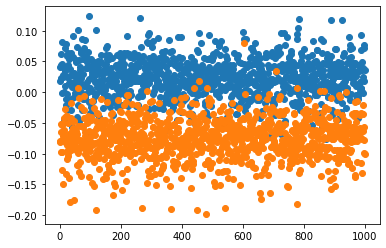

In [278]:
x_axis = np.arange(1,1001,1)
plt.scatter(x_axis, X_train_h_r[:,0])
plt.scatter(x_axis, X_train_h_r[:,7])
plt.show()

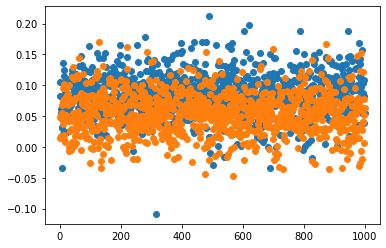

In [279]:
x_axis = np.arange(1,1001,1)
plt.scatter(x_axis,X_train_h_r[:,8])
plt.scatter(x_axis,X_train_h_r[:,1])
plt.show()

In [334]:
# kmeans Algorithm 
centroid, label = kmeans2(X_train_h_r, k = 2, seed=22)

y_pred1 = np.zeros((len(X_test_h_r)))

for i in range(len(X_test_h_r)):
    if distance.euclidean( X_test_h_r[i,:] , centroid[0,:] ) < distance.euclidean( X_test_h_r[i,:] , centroid[1,:] ):
        y_pred1[i] = 0
        #y_e_r = y[label == i]
    elif distance.euclidean( X_test_h_r[i,:] , centroid[0,:] ) >= distance.euclidean( X_test_h_r[i,:] ,centroid[1,:]):
        y_pred1[i] = 1
    else:
        y_pred1[i] = None
   

acc_scc = accuracy_score(Y_train_h_r, label)
print(f'The accuracy of kmeans for USL on train data home is = {acc_scc}')


acc_scc = accuracy_score(Y_test_h_r, y_pred1)
print(f'The accuracy of kmeans for USL on test data home is = {acc_scc}')

cm = confusion_matrix(Y_test_h_r, y_pred1)
print(cm)

The accuracy of kmeans for USL on train data home is = 0.621
The accuracy of kmeans for USL on test data home is = 0.61
[[100  50]
 [ 67  83]]
